## What is an API?

API stands for Application Programming Interface, it's a sort of messenger between a server holding some data in a database and a client requesting that data (us). It usually does not matter how things work under the hood of an API so what it does, and how it does it, is no concern of ours! (At least for this tutorial.) The image below shows what we aim to do - create a program that will send API requests to the Space-Track API endpoint, and then receive the information that we have requested. 


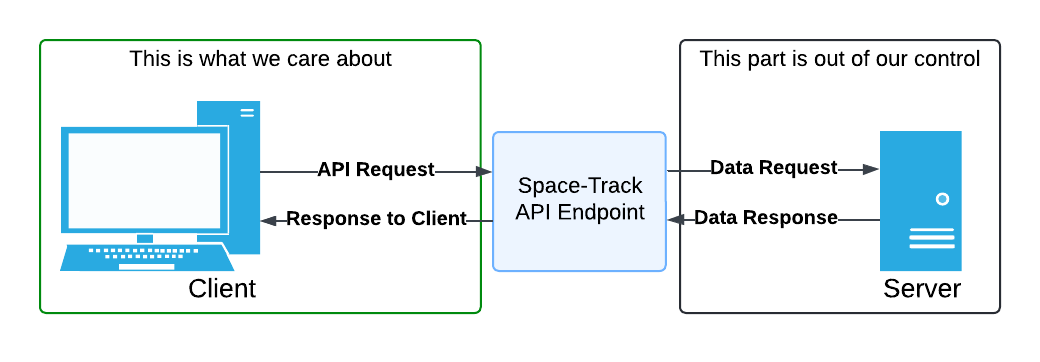

In [13]:
import requests
import json
import time
from datetime import datetime
import configparser


baseURL = "https://www.space-track.org"
authPath = "/ajaxauth/login"

config = configparser.ConfigParser()
config.read("./config.ini")
username = config.get("configuration","username")
password = config.get("configuration","password")



query = "/basicspacedata/query/class/gp/COUNTRY_CODE/UK/orderby/COUNTRY_CODE%20asc/limit/100/emptyresult/show";


with requests.Session() as session: # This provides cookie persistance so our login credentials are remembered for the whole session. 
    
    # Send the username and password data to the website.
    response = session.post(baseURL + authPath, data = {"identity":username, "password":password})
    
    
    
    # Check whether the website got the data, a status_code of 200 means it did. 
    if response.status_code != 200:
        print(f"Could not POST for login: {response}") # f-strings are incredibly convieniant!
    
    response = session.get(baseURL + query) # Let's get the data.

    # Check whether this GET request is valid. 
    if response.status_code != 200:
        print(f"Could not GET data: {response}")
        
    response = json.loads(response.text)
   # print(response.keys())

    
    
    print(response[0])
    session.close()

{'CCSDS_OMM_VERS': '3.0', 'COMMENT': 'GENERATED VIA SPACE-TRACK.ORG API', 'CREATION_DATE': '2025-03-09T04:03:08', 'ORIGINATOR': '18 SPCS', 'OBJECT_NAME': 'ELEVATION-1', 'OBJECT_ID': '2025-009BW', 'CENTER_NAME': 'EARTH', 'REF_FRAME': 'TEME', 'TIME_SYSTEM': 'UTC', 'MEAN_ELEMENT_THEORY': 'SGP4', 'EPOCH': '2025-03-08T18:39:12.863808', 'MEAN_MOTION': '15.19084930', 'ECCENTRICITY': '0.00062890', 'INCLINATION': '97.4301', 'RA_OF_ASC_NODE': '149.5490', 'ARG_OF_PERICENTER': '164.5266', 'MEAN_ANOMALY': '195.6162', 'EPHEMERIS_TYPE': '0', 'CLASSIFICATION_TYPE': 'U', 'NORAD_CAT_ID': '62677', 'ELEMENT_SET_NO': '999', 'REV_AT_EPOCH': '6567', 'BSTAR': '0.00134410000000', 'MEAN_MOTION_DOT': '0.00028226', 'MEAN_MOTION_DDOT': '0.0000000000000', 'SEMIMAJOR_AXIS': '6886.742', 'PERIOD': '94.794', 'APOAPSIS': '512.938', 'PERIAPSIS': '504.276', 'OBJECT_TYPE': 'PAYLOAD', 'RCS_SIZE': 'MEDIUM', 'COUNTRY_CODE': 'UK', 'LAUNCH_DATE': '2025-01-14', 'SITE': 'AFWTR', 'DECAY_DATE': None, 'FILE': '4663307', 'GP_ID': '28

In [3]:
print(len(response[0]))

40


In [20]:
l = []
for i in response:
    
    gp_id = i["GP_ID"]
    norad_id = i["NORAD_CAT_ID"]
    ecc = float(i["ECCENTRICITY"])
    inc = float(i["INCLINATION"])
    raan = float(i["RA_OF_ASC_NODE"])
    argp = float(i["ARG_OF_PERICENTER"])
    
    l.append([(gp_id,norad_id), ecc, inc, raan, argp])

print(l)

    

[[('282632415', '62677'), 0.0006289, 97.4301, 149.549, 164.5266], [('282550748', '62457'), 0.7224614, 7.989, 350.2808, 196.0134], [('282551247', '62456'), 0.730374, 8.2016, 349.3339, 196.815], [('282550747', '62455'), 0.7309779, 8.3284, 349.6558, 196.6417], [('282551246', '62454'), 0.7469912, 8.6879, 350.2811, 196.8709], [('282631428', '61613'), 0.0001206, 87.8913, 128.9919, 92.6388], [('282594217', '61612'), 0.000155, 87.886, 129.1328, 81.7412], [('282638198', '61611'), 0.0001308, 87.934, 128.9624, 135.0117], [('282637834', '61610'), 0.0001203, 87.8769, 128.9657, 102.8744], [('282638197', '61609'), 0.0001119, 87.8992, 128.874, 126.5778], [('282639622', '61608'), 0.0007983, 87.3487, 114.904, 101.8415], [('282631425', '61607'), 0.0002064, 87.8862, 129.088, 76.6992], [('282600884', '61606'), 0.0001442, 87.8774, 129.0522, 83.7175], [('282594713', '61605'), 0.0002306, 87.8859, 129.1457, 93.384], [('282640526', '61604'), 0.0006295, 87.3633, 114.9346, 100.1963], [('282637833', '61603'), 0.00

In [5]:
print(len(l))

100


In [6]:
import csv # We will use a CSV file as it is easier to parse data this way

In [23]:
# Creates a csv file with some satellite information
with open('Satellite.csv', 'w', newline='') as f:
    
    writer = csv.writer(f)
    x = ["(GP_ID, NORAD_CAT_ID)", "ECCENTRICITY","INCLINATION","RA_OF_ASCENDING_NODE", "ARG OF PERICENTRE" ]
    writer.writerow(x)
    writer.writerows(l)